In [1]:
# import libraries
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# set display options
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50
# code formating
%load_ext nb_black

# project paths
project_root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
data_path = os.path.join(project_root_dir, "data")
image_path = os.path.join(project_root_dir, "images")
os.makedirs(image_path, exist_ok=True)
model_path = os.path.join(project_root_dir, "models")
os.makedirs(model_path, exist_ok=True)

# function for loading data
def load_data(filename, data_path=data_path):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

def save_model(model, model_name, path=model_path):
    """This function save the trained model in pickle format"""
    path = os.path.join(model_path, model_name)
    joblib.dump(model, path)
    
def load_model(model_name, path=model_path):
    """This function loads the model"""
    model_to_load = os.path.join(model_path, model_name)
    return joblib.load(model_to_load)

# function for saving data as csv file
def save_dataframe(df, filename, file_path=data_path):
    """
    This function takes a dataframe and save it as a csv file.
    """
    path = os.path.join(file_path, filename)
    df.to_csv(path, index=False)


<IPython.core.display.Javascript object>

In [2]:
# Read the data
X_train = load_data("train_values.csv")
y_train = load_data("train_labels.csv")
X_test = load_data("test_values.csv")
submission_format = load_data("submission_format.csv")

<IPython.core.display.Javascript object>

In [3]:
X_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [4]:
X_train["count_floors_pre_eq"].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

<IPython.core.display.Javascript object>

In [5]:
X_train["height_percentage"].nunique()

27

<IPython.core.display.Javascript object>

In [6]:
X_train["count_families"].nunique()

10

<IPython.core.display.Javascript object>

In [7]:
y_train.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


<IPython.core.display.Javascript object>

In [8]:
y_train = y_train["damage_grade"].copy()
y_train

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
X_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [10]:
X_train.shape

(260601, 39)

<IPython.core.display.Javascript object>

In [11]:
X_test.shape

(86868, 39)

<IPython.core.display.Javascript object>

## Data Preparation For ML

In [12]:
# select numerical columns
num_cols = X_train.select_dtypes(include=["number"]).columns.to_list()
num_cols.remove("building_id")
num_cols

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

<IPython.core.display.Javascript object>

In [13]:
def num_to_cat_list(df, num_col_list, n_unique_val):
    """This function takes a pandas dataframe, a list of numerical columns
    and create a list of columns that needs to be converted to categorical column if
    it is less than or equal to n_unique_val."""

    # columns that needs to converted
    cols_to_convert = []
    for col in num_col_list:
        unique_val = df[col].nunique()
        print(col, unique_val)
        if unique_val <= n_unique_val:
            cols_to_convert.append(col)
    return cols_to_convert

<IPython.core.display.Javascript object>

In [14]:
a_list = num_to_cat_list(X_train, num_cols, 15)

geo_level_1_id 31
geo_level_2_id 1414
geo_level_3_id 11595
count_floors_pre_eq 9
age 42
area_percentage 84
height_percentage 27
has_superstructure_adobe_mud 2
has_superstructure_mud_mortar_stone 2
has_superstructure_stone_flag 2
has_superstructure_cement_mortar_stone 2
has_superstructure_mud_mortar_brick 2
has_superstructure_cement_mortar_brick 2
has_superstructure_timber 2
has_superstructure_bamboo 2
has_superstructure_rc_non_engineered 2
has_superstructure_rc_engineered 2
has_superstructure_other 2
count_families 10
has_secondary_use 2
has_secondary_use_agriculture 2
has_secondary_use_hotel 2
has_secondary_use_rental 2
has_secondary_use_institution 2
has_secondary_use_school 2
has_secondary_use_industry 2
has_secondary_use_health_post 2
has_secondary_use_gov_office 2
has_secondary_use_use_police 2
has_secondary_use_other 2


<IPython.core.display.Javascript object>

In [15]:
# convert these columns to categorical
for col in a_list:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

<IPython.core.display.Javascript object>

In [16]:
num_cols = X_train.select_dtypes(include=["number"]).columns.to_list()
num_cols

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'age',
 'area_percentage',
 'height_percentage']

<IPython.core.display.Javascript object>

In [17]:
num_cols.remove("building_id")

<IPython.core.display.Javascript object>

In [18]:
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()
cat_cols

['count_floors_pre_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

<IPython.core.display.Javascript object>

## Create Preparation Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numerical columns pipeline
num_pipeline = Pipeline(
    [
        ("num_imputer", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ]
)

# categorical columns pipeline
cat_pipeline = Pipeline(
    [
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)

# full pipeline
full_pipeline = ColumnTransformer(
    [("num", num_pipeline, num_cols), ("cat", cat_pipeline, cat_cols),]
)

<IPython.core.display.Javascript object>

In [20]:
# fit and transform the data sets
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

<IPython.core.display.Javascript object>

In [21]:
# Get the list of categories generated by the one-hot-encoder
ohe_categories = full_pipeline.named_transformers_["cat"]["one_hot_encoder"].categories_
# Create nice names for our one hot encoded features
new_ohe_features = [
    f"{col}__{val}" for col, vals in zip(cat_cols, ohe_categories) for val in vals
]

# Create a new list with all names of features
all_features = num_cols + new_ohe_features

# Create pandas dataframe
X_train = pd.DataFrame(X_train, columns=all_features)
X_test = pd.DataFrame(X_test, columns=all_features)

<IPython.core.display.Javascript object>

In [22]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,count_floors_pre_eq__1,count_floors_pre_eq__2,count_floors_pre_eq__3,count_floors_pre_eq__4,count_floors_pre_eq__5,count_floors_pre_eq__6,count_floors_pre_eq__7,count_floors_pre_eq__8,count_floors_pre_eq__9,land_surface_condition__n,land_surface_condition__o,land_surface_condition__t,foundation_type__h,foundation_type__i,foundation_type__r,foundation_type__u,foundation_type__w,roof_type__n,roof_type__q,roof_type__x,ground_floor_type__f,ground_floor_type__m,ground_floor_type__v,ground_floor_type__x,ground_floor_type__z,other_floor_type__j,other_floor_type__q,other_floor_type__s,other_floor_type__x,position__j,position__o,position__s,position__t,plan_configuration__a,plan_configuration__c,plan_configuration__d,plan_configuration__f,plan_configuration__m,plan_configuration__n,plan_configuration__o,plan_configuration__q,plan_configuration__s,plan_configuration__u,has_superstructure_adobe_mud__0,has_superstructure_adobe_mud__1,has_superstructure_mud_mortar_stone__0,has_superstructure_mud_mortar_stone__1,has_superstructure_stone_flag__0,has_superstructure_stone_flag__1,has_superstructure_cement_mortar_stone__0,has_superstructure_cement_mortar_stone__1,has_superstructure_mud_mortar_brick__0,has_superstructure_mud_mortar_brick__1,has_superstructure_cement_mortar_brick__0,has_superstructure_cement_mortar_brick__1,has_superstructure_timber__0,has_superstructure_timber__1,has_superstructure_bamboo__0,has_superstructure_bamboo__1,has_superstructure_rc_non_engineered__0,has_superstructure_rc_non_engineered__1,has_superstructure_rc_engineered__0,has_superstructure_rc_engineered__1,has_superstructure_other__0,has_superstructure_other__1,legal_ownership_status__a,legal_ownership_status__r,legal_ownership_status__v,legal_ownership_status__w,count_families__0,count_families__1,count_families__2,count_families__3,count_families__4,count_families__5,count_families__6,count_families__7,count_families__8,count_families__9,has_secondary_use__0,has_secondary_use__1,has_secondary_use_agriculture__0,has_secondary_use_agriculture__1,has_secondary_use_hotel__0,has_secondary_use_hotel__1,has_secondary_use_rental__0,has_secondary_use_rental__1,has_secondary_use_institution__0,has_secondary_use_institution__1,has_secondary_use_school__0,has_secondary_use_school__1,has_secondary_use_industry__0,has_secondary_use_industry__1,has_secondary_use_health_post__0,has_secondary_use_health_post__1,has_secondary_use_gov_office__0,has_secondary_use_gov_office__1,has_secondary_use_use_police__0,has_secondary_use_use_police__1,has_secondary_use_other__0,has_secondary_use_other__1
0,-0.983414,-0.518705,1.629055,0.047100,-0.459460,-0.226419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.734459,0.481998,-0.945017,-0.224765,-0.004110,0.816109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.883744,-0.819158,0.744612,-0.224765,-0.687135,-0.226419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.

<IPython.core.display.Javascript object>

In [23]:
X_train.shape

(260601, 107)

<IPython.core.display.Javascript object>

In [24]:
X_test.shape

(86868, 107)

<IPython.core.display.Javascript object>

In [25]:
save_dataframe(X_train, "X_train_tr.csv")

<IPython.core.display.Javascript object>

In [26]:
save_dataframe(X_test, "X_test_tr.csv")

<IPython.core.display.Javascript object>

## Model Training 

### Baseline Model

In [27]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

<IPython.core.display.Javascript object>

In [28]:
dummy_clf_pred = dummy_clf.predict(X_train)
# measure accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_train, dummy_clf_pred)

0.33445200193227187

<IPython.core.display.Javascript object>

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight="balanced", random_state=42, max_iter=1000, n_jobs=-1
)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_train)

# measure accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_train, log_reg_pred)

0.5793872275827857

<IPython.core.display.Javascript object>

In [30]:
# cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.50745392, 0.50905407, 0.50900802])

<IPython.core.display.Javascript object>

In [31]:
save_model(log_reg, "log_reg.pkl")

<IPython.core.display.Javascript object>

### SGD Classifier

In [32]:
# build a SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_train)

# measure accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_train, sgd_pred)

0.40500327687701126

<IPython.core.display.Javascript object>

In [33]:
save_model(sgd_clf, "sgd_clf.pkl")

<IPython.core.display.Javascript object>

### SVM Classifier

In [34]:
from sklearn.svm import LinearSVC

lin_svm_clf = LinearSVC(
    random_state=42, class_weight="balanced", max_iter=2000, dual=False
)
lin_svm_clf.fit(X_train, y_train)
lin_svm_pred = lin_svm_clf.predict(X_train)

# measure accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_train, lin_svm_pred)

0.5630469907706314

<IPython.core.display.Javascript object>

In [35]:
save_model(lin_svm_clf, "lin_svm_clf.pkl")

<IPython.core.display.Javascript object>

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_train)

balanced_accuracy_score(y_train, tree_pred)

0.9894225058136277

<IPython.core.display.Javascript object>

In [37]:
save_model(tree_clf, "tree_clf.pkl")

<IPython.core.display.Javascript object>

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_train)

balanced_accuracy_score(y_train, rf_pred)

0.9882394984559145

<IPython.core.display.Javascript object>

In [39]:
# cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.70020836, 0.70351227, 0.70430658])

<IPython.core.display.Javascript object>

In [40]:
# cv score using competition evaluation metric
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="f1_micro")

array([0.70020836, 0.70351227, 0.70430658])

<IPython.core.display.Javascript object>

In [41]:
save_model(rf_clf, "rf_clf.pkl")

<IPython.core.display.Javascript object>

We can see that the random forest and decision tree model is overfitting the data very badly. The score on the 
training set is much higher than the score in validation set.

### Initial Submission

Even though the model is overfitting let's make our initial submission in the competition website and measure the 
score.

In [42]:
submission_format.head()

,building_id,damage_grade
0,300051,1
1,99355,1
2,890251,1
3,745817,1
4,421793,1


<IPython.core.display.Javascript object>

In [43]:
rf_pred_test = rf_clf.predict(X_test)

<IPython.core.display.Javascript object>

In [44]:
submission_format["damage_grade"] = rf_pred_test
submission_format.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,3


<IPython.core.display.Javascript object>

In [45]:
# save_dataframe(submission_format, "sf_rf_basic.csv")

<IPython.core.display.Javascript object>

The score on the leaderboard is 0.7076 and the current ranking is 592 out of 3199 competitors.

## Model Evaluation

### Confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train, rf_pred)
conf_mat

array([[ 25076,     44,      4],
       [   804, 145251,   2204],
       [   123,   1018,  86077]])

<IPython.core.display.Javascript object>

In [47]:
rf_clf.classes_

array([1, 2, 3])

<IPython.core.display.Javascript object>

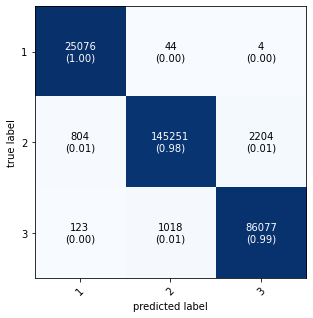

<IPython.core.display.Javascript object>

In [48]:
# visualize the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

class_names = ["1", "2", "3"]
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat,
    show_absolute=True,
    show_normed=True,
    figsize=(5, 5),
    class_names=class_names,
)
plt.show()

We can see that, we are making more error in predicting label 2, followed by label 3 and 1.

### precision and recall

In [49]:
from sklearn.metrics import precision_score

precision_score(y_train, rf_pred, average="micro")

0.9838949198199547

<IPython.core.display.Javascript object>

In [50]:
from sklearn.metrics import recall_score

recall_score(y_train, rf_pred, average="micro")

0.9838949198199547

<IPython.core.display.Javascript object>

We can see that, as the model is overfitting too much, both the precision and recall is very high on the training set.